In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

from xverse.ensemble import VotingSelector
#from lightgbm import LGBMClassifier

pd.set_option('display.max_columns', None)
%config InlineBackend.figure_format = 'retina' 
%matplotlib inline
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('stroke_model.csv')
df

,rowID,patientAge,patientSexName,smoking,alcohol,vital_bmi,vital_hr,vital_pulse,vital_temperature,vital_rr,vital_bps,vital_bpd,LDL-Cholesterol,Hypertension,Hyperlipidaemia,Diabetes_Mellitus,Hemiplegia,Chronic_kidney,Atrial_fibrillation,Hypokalemia,stroke,Age_R,health_level,LDL_level,Creatinine,Cholesterol,FBS,Triglyceride,Potassium,HCT,Age_R_e,health_level_e,LDL_level_e
0,3719915,69,0.00,0.00,0.00,25.30,80.00,73.00,36.00,16.00,150.00,90.00,124.00,1,0,0,0,0,0,0,1,65-69,obese 1,close to normal,0.70,142.60,97.20,347.00,3.92,39.54,10,4,2
1,215399,75,1.00,1.00,0.00,26.78,80.00,80.00,36.60,20.00,150.00,84.00,86.00,1,1,1,0,0,0,0,1,75+,obese 1,normal,1.11,158.60,128.00,92.80,4.95,38.34,12,4,1
2,1556914,80,1.00,1.00,1.00,25.13,80.00,69.00,36.50,20.00,144.00,66.00,141.00,1,0,0,0,1,0,0,1,75+,obese 1,quite high,1.40,218.00,93.00,218.00,4.50,38.00,12,4,3
3,3970389,51,1.00,1.00,0.00,31.49,80.00,78.00,36.50,20.00,130.00,70.00,95.00,1,1,0,0,0,0,0,1,50-54,obese 2,normal,1.30,159.00,98.00,120.00,4.00,49.00,7,5,1
4,100835,57,0.00,1.00,0.00,29.30,80.00,94.00,36.00,16.00,120.00,89.00,101.00,1,0,0,0,0,0,0,1,55-59,obese 1,close to normal,0.92,193.00,124.00,178.00,3.99,40.04,8,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26496,7590153,68,0.00,0.00,0.00,27.56,80.00,72.00,37.00,20.00,144.00,67.00,170.00,1,1,0,0,0,0,0,0,65-69,obese 1,high,0.67,261.00,99.00,128.00,4.00,41.00,10,4,4
26497,7589648,62,0.00,0.00,0.00,26.90,80.00,92.00,36.50,20.00,154.00,90.00,108.00,0,0,0,0,0,0,0,0,60-64,obese 1,close to normal,0.82,188.00,120.00,138.00,4.60,43.00,9,4,2
26498,7595099,64,0.00,0.00,0.00,31.33,80.00,66.00,35.20,20.00,187.00,69.00,101.00,1,1,0,0,1,0,0,0,60-64,obese 2,close to normal,2.11,171.00,214.00,126.00,5.05,32.80,9,5,2
26499,7589985,63,1.00,0.00,0.00,24.39,80.00,69.00,36.60,20.00,130.00,75.00,112.00,0,0,0,0,0,0,0,0,60-64,overweight,close to normal,0.90,199.00,114.00,59.00,4.40,45.20,9,3,2


In [3]:
df_cor = df.corr()
df_cor.style.background_gradient(cmap='Blues').format('{:.2f}')

,rowID,patientAge,patientSexName,smoking,alcohol,vital_bmi,vital_hr,vital_pulse,vital_temperature,vital_rr,vital_bps,vital_bpd,LDL-Cholesterol,Hypertension,Hyperlipidaemia,Diabetes_Mellitus,Hemiplegia,Chronic_kidney,Atrial_fibrillation,Hypokalemia,stroke,Creatinine,Cholesterol,FBS,Triglyceride,Potassium,HCT,Age_R_e,health_level_e,LDL_level_e
rowID,1.00,-0.02,0.01,-0.01,-0.01,0.02,-0.02,0.03,-0.16,0.05,0.06,0.10,0.05,-0.03,-0.04,-0.04,-0.01,-0.03,-0.01,-0.00,-0.03,0.00,0.05,-0.01,0.00,-0.08,0.05,-0.02,0.02,0.05
patientAge,-0.02,1.00,-0.06,-0.06,-0.10,-0.21,-0.03,-0.17,-0.02,0.00,0.11,-0.30,-0.11,0.21,0.10,0.02,0.00,0.20,0.09,-0.00,-0.00,0.05,-0.11,-0.05,-0.10,0.10,-0.19,0.98,-0.19,-0.10
patientSexName,0.01,-0.06,1.00,0.37,0.39,-0.09,-0.00,-0.04,-0.00,-0.07,-0.01,0.11,-0.09,-0.04,-0.06,-0.06,0.03,0.04,0.02,0.01,0.19,0.17,-0.15,-0.03,-0.00,-0.02,0.34,-0.06,-0.07,-0.09
smoking,-0.01,-0.06,0.37,1.00,0.59,-0.06,-0.02,-0.01,0.04,-0.02,-0.07,0.02,-0.04,-0.05,-0.07,-0.03,0.01,0.01,-0.01,-0.01,0.02,0.04,-0.03,-0.01,0.03,0.01,0.14,-0.06,-0.07,-0.03
alcohol,-0.01,-0.10,0.39,0.59,1.00,-0.03,-0.01,0.00,0.05,0.02,-0.05,0.06,-0.02,-0.03,-0.09,-0.03,-0.00,0.01,-0.01,-0.01,-0.06,0.03,0.00,-0.01,0.02,-0.01,0.16,-0.10,-0.03,-0.02
vital_bmi,0.02,-0.21,-0.09,-0.06,-0.03,1.00,0.01,0.04,-0.03,0.03,0.13,0.17,0.02,0.13,0.06,0.12,-0.02,0.01,-0.03,-0.01,-0.07,-0.03,0.00,0.11,0.16,0.01,0.11,-0.20,0.89,0.01
vital_hr,-0.02,-0.03,-0.00,-0.02,-0.01,0.01,1.00,0.21,0.03,0.01,-0.00,0.03,0.01,-0.00,0.02,0.05,0.01,-0.01,0.01,-0.00,0.01,-0.01,-0.00,0.05,0.01,-0.01,0.02,-0.03,0.01,0.01
vital_pulse,0.03,-0.17,-0.04,-0.01,0.00,0.04,0.21,1.00,0.02,0.04,0.06,0.19,0.01,-0.01,-0.03,0.08,-0.01,-0.04,-0.01,0.01,-0.04,-0.04,0.04,0.15,0.06,-0.05,0.02,-0.17,0.02,0.02
vital_temperature,-0.16,-0.02,-0.00,0.04,0.05,-0.03,0.03,0.02,1.00,0.11,-0.13,-0.11,-0.00,-0.03,-0.05,0.01,0.00,-0.00,-0.00,-0.02,-0.07,0.03,0.02,0.02,0.01,0.02,-0.03,-0.02,-0.03,0.00
vital_rr,0.05,0.00,-0.07,-0.02,0.02,0.03,0.01,0.04,0.11,1.00,-0.01,-0.04,0.07,0.00,0.01,0.07,-0.00,0.03,0.00,-0.03,-0.28,0.01,0.08,0.04,0.03,0.03,-0.03,0.00,0.02,0.06


In [4]:
df.isnull().sum()

rowID                  0
patientAge             0
patientSexName         0
smoking                0
alcohol                0
vital_bmi              0
vital_hr               0
vital_pulse            0
vital_temperature      0
vital_rr               0
vital_bps              0
vital_bpd              0
LDL-Cholesterol        0
Hypertension           0
Hyperlipidaemia        0
Diabetes_Mellitus      0
Hemiplegia             0
Chronic_kidney         0
Atrial_fibrillation    0
Hypokalemia            0
stroke                 0
Age_R                  0
health_level           0
LDL_level              0
Creatinine             0
Cholesterol            0
FBS                    0
Triglyceride           0
Potassium              0
HCT                    0
Age_R_e                0
health_level_e         0
LDL_level_e            0
dtype: int64

In [5]:
# sns.scatterplot(x='patientAge', y='LDL-Cholesterol', hue='stroke', data=df);

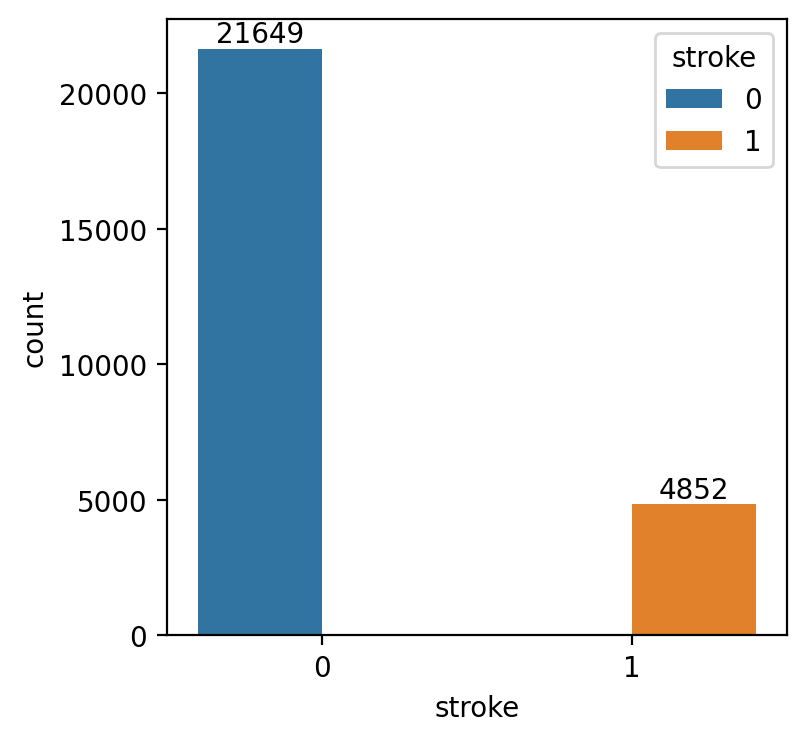

In [6]:
# plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(4,4))
ax = sns.countplot(x='stroke', hue='stroke', data=(df))
for container in ax.containers:
    ax.bar_label(container)

In [7]:
df.columns

Index(['rowID', 'patientAge', 'patientSexName', 'smoking', 'alcohol',
       'vital_bmi', 'vital_hr', 'vital_pulse', 'vital_temperature', 'vital_rr',
       'vital_bps', 'vital_bpd', 'LDL-Cholesterol', 'Hypertension',
       'Hyperlipidaemia', 'Diabetes_Mellitus', 'Hemiplegia', 'Chronic_kidney',
       'Atrial_fibrillation', 'Hypokalemia', 'stroke', 'Age_R', 'health_level',
       'LDL_level', 'Creatinine', 'Cholesterol', 'FBS', 'Triglyceride',
       'Potassium', 'HCT', 'Age_R_e', 'health_level_e', 'LDL_level_e'],
      dtype='object')

In [8]:
X = df.drop(['rowID', 'stroke','Age_R','health_level','LDL_level','Age_R_e','health_level_e','LDL_level_e'], axis=1)
y = df['stroke']

In [9]:
X

,patientAge,patientSexName,smoking,alcohol,vital_bmi,vital_hr,vital_pulse,vital_temperature,vital_rr,vital_bps,vital_bpd,LDL-Cholesterol,Hypertension,Hyperlipidaemia,Diabetes_Mellitus,Hemiplegia,Chronic_kidney,Atrial_fibrillation,Hypokalemia,Creatinine,Cholesterol,FBS,Triglyceride,Potassium,HCT
0,69,0.00,0.00,0.00,25.30,80.00,73.00,36.00,16.00,150.00,90.00,124.00,1,0,0,0,0,0,0,0.70,142.60,97.20,347.00,3.92,39.54
1,75,1.00,1.00,0.00,26.78,80.00,80.00,36.60,20.00,150.00,84.00,86.00,1,1,1,0,0,0,0,1.11,158.60,128.00,92.80,4.95,38.34
2,80,1.00,1.00,1.00,25.13,80.00,69.00,36.50,20.00,144.00,66.00,141.00,1,0,0,0,1,0,0,1.40,218.00,93.00,218.00,4.50,38.00
3,51,1.00,1.00,0.00,31.49,80.00,78.00,36.50,20.00,130.00,70.00,95.00,1,1,0,0,0,0,0,1.30,159.00,98.00,120.00,4.00,49.00
4,57,0.00,1.00,0.00,29.30,80.00,94.00,36.00,16.00,120.00,89.00,101.00,1,0,0,0,0,0,0,0.92,193.00,124.00,178.00,3.99,40.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26496,68,0.00,0.00,0.00,27.56,80.00,72.00,37.00,20.00,144.00,67.00,170.00,1,1,0,0,0,0,0,0.67,261.00,99.00,128.00,4.00,41.00
26497,62,0.00,0.00,0.00,26.90,80.00,92.00,36.50,20.00,154.00,90.00,108.00,0,0,0,0,0,0,0,0.82,188.00,120.00,138.00,4.60,43.00
26498,64,0.00,0.00,0.00,31.33,80.00,66.00,35.20,20.00,187.00,69.00,101.00,1,1,0,0,1,0,0,2.11,171.00,214.00,126.00,5.05,32.80
26499,63,1.00,0.00,0.00,24.39,80.00,69.00,36.60,20.00,130.00,75.00,112.00,0,0,0,0,0,0,0,0.90,199.00,114.00,59.00,4.40,45.20


In [10]:
y

0        1
1        1
2        1
3        1
4        1
        ..
26496    0
26497    0
26498    0
26499    0
26500    0
Name: stroke, Length: 26501, dtype: int64

In [11]:
Counter(y)

Counter({1: 4852, 0: 21649})

In [12]:
y.value_counts()

0    21649
1     4852
Name: stroke, dtype: int64

In [13]:
# train 80 & test 20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)

In [14]:
print(len(X_test))
print(len(X_train))

2651
23850


## Decision Tree เฉย ๆ

In [15]:
from sklearn import tree

In [16]:
dt = tree.DecisionTreeClassifier()

In [17]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
dt.score(X_train,y_train)

1.0

In [19]:
dt.score(X_test,y_test) #score = accuracy

0.8162957374575632

In [20]:
# new = [2, 155, 50, 30, 200, 25, 0.24, 34]
# new_pred = dt.predict([new])
# new_pred

In [21]:
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [22]:
confusion_matrix(y_test, y_pred)

array([[1936,  272],
       [ 215,  228]], dtype=int64)

In [23]:
# plot_confusion_matrix(dt, X_test, y_test);

In [24]:
# metrics.precision_score(y_test, y_pred)

In [25]:
# metrics.recall_score(y_test, y_pred)

In [26]:
tn,fp,fn,tp = metrics.confusion_matrix(y_test, y_pred).ravel()

In [27]:
recall = tp/(tp+fn)
recall

0.5146726862302483

In [28]:
precision = tp/(tp+fp)
precision

0.456

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2208
           1       0.46      0.51      0.48       443

    accuracy                           0.82      2651
   macro avg       0.68      0.70      0.69      2651
weighted avg       0.83      0.82      0.82      2651



## Random Forest เฉย ๆ

In [30]:
rf = RandomForestClassifier()

In [31]:
rf = rf.fit(X_train, y_train)

In [32]:
y_pred = rf.predict(X_test)

In [33]:
rf.score(X_train, y_train)

1.0

In [34]:
rf.score(X_test, y_test)

0.8819313466616371

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2208
           1       0.80      0.39      0.52       443

    accuracy                           0.88      2651
   macro avg       0.85      0.68      0.73      2651
weighted avg       0.87      0.88      0.86      2651



In [36]:
# plot_confusion_matrix(rf, X_test, y_test);

## Feature Impotances 

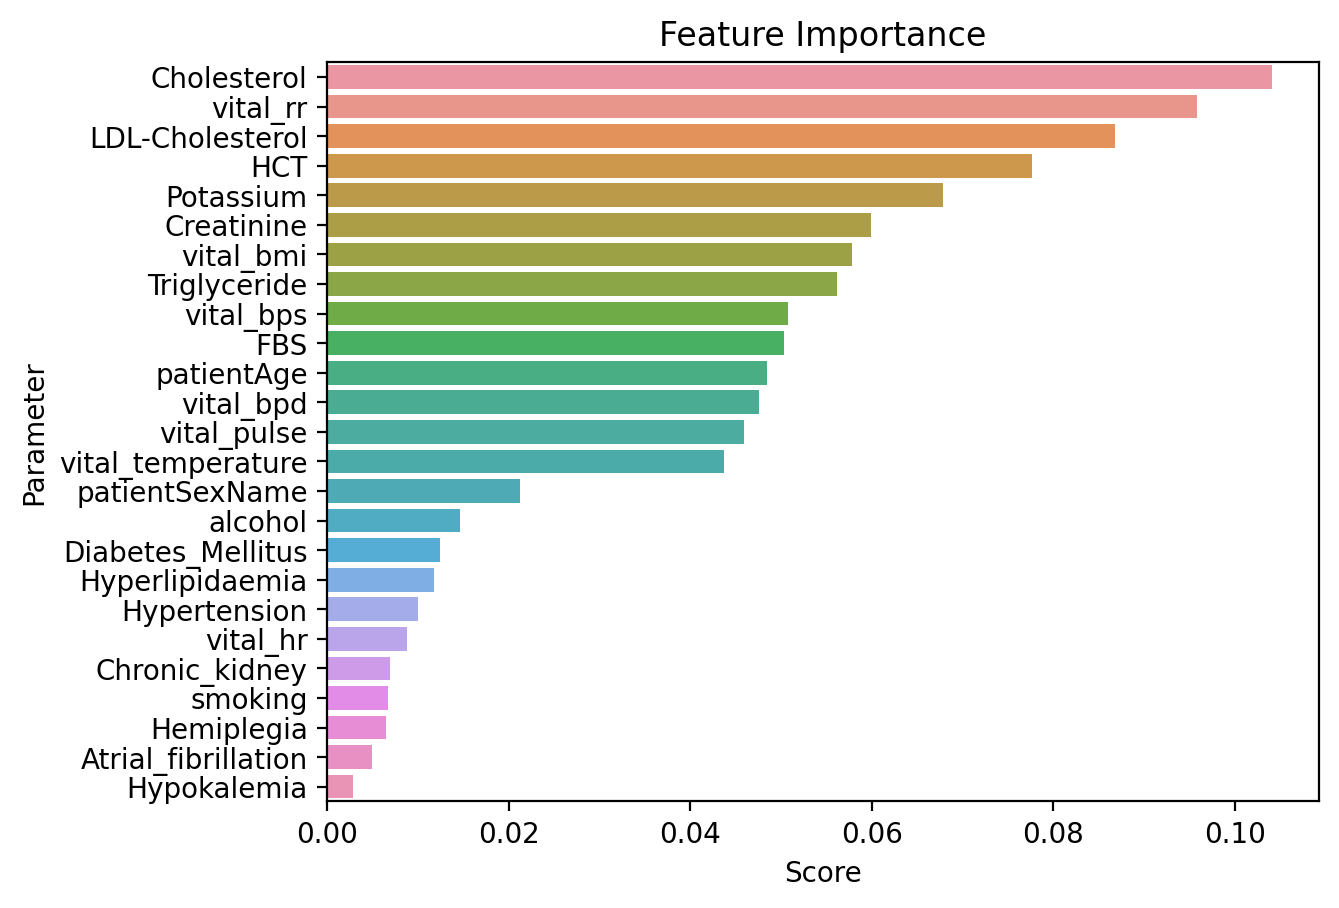

In [37]:
features = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

sns.barplot(x=features, y=features.index)
plt.xlabel('Score')
plt.ylabel('Parameter')
plt.title('Feature Importance')
plt.show()

In [38]:
fs = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
fs

Cholesterol           0.10
vital_rr              0.10
LDL-Cholesterol       0.09
HCT                   0.08
Potassium             0.07
Creatinine            0.06
vital_bmi             0.06
Triglyceride          0.06
vital_bps             0.05
FBS                   0.05
patientAge            0.05
vital_bpd             0.05
vital_pulse           0.05
vital_temperature     0.04
patientSexName        0.02
alcohol               0.01
Diabetes_Mellitus     0.01
Hyperlipidaemia       0.01
Hypertension          0.01
vital_hr              0.01
Chronic_kidney        0.01
smoking               0.01
Hemiplegia            0.01
Atrial_fibrillation   0.00
Hypokalemia           0.00
dtype: float64

In [39]:
# fs.sort_values(ascending=True).plot(kind='barh' , color='orange')

In [40]:
fs[fs > 0.05]

Cholesterol       0.10
vital_rr          0.10
LDL-Cholesterol   0.09
HCT               0.08
Potassium         0.07
Creatinine        0.06
vital_bmi         0.06
Triglyceride      0.06
vital_bps         0.05
FBS               0.05
dtype: float64

In [41]:
X = df[['vital_bmi','Cholesterol','Triglyceride','LDL-Cholesterol','vital_pulse','FBS',
       'Creatinine','patientAge','vital_bps','vital_bpd']]
y = df['stroke']

In [42]:
# fs > 0.05

In [43]:
# forest = RandomForestClassifier()
# forest.fit(X, y)

In [44]:
# df_scores = pd.DataFrame({'feature':X.columns,'importanceScore': forest.feature_importances_})
# df_scores.plot.barh(x='feature', y='importanceScore');

In [45]:
# features = df_scores[df_scores['importanceScore'] > 0.05]
# features

In [46]:
# cols = features.index
# cols

In [47]:
# df.columns

In [48]:
# X = df.drop(['rowID', 'stroke','Age_R','health_level','LDL_level','Chronic_kidney','Hypokalemia',
#            'vital_rr','Atrial_fibrillation','vital_hr','vital_temperature','Hemiplegia','Hypertension',
#             'Diabetes_Mellitus','Hyperlipidaemia','exercise','smoking','patientSexName','alcohol'], axis=1)
# y = df['stroke']

In [49]:
X

,vital_bmi,Cholesterol,Triglyceride,LDL-Cholesterol,vital_pulse,FBS,Creatinine,patientAge,vital_bps,vital_bpd
0,25.30,142.60,347.00,124.00,73.00,97.20,0.70,69,150.00,90.00
1,26.78,158.60,92.80,86.00,80.00,128.00,1.11,75,150.00,84.00
2,25.13,218.00,218.00,141.00,69.00,93.00,1.40,80,144.00,66.00
3,31.49,159.00,120.00,95.00,78.00,98.00,1.30,51,130.00,70.00
4,29.30,193.00,178.00,101.00,94.00,124.00,0.92,57,120.00,89.00
...,...,...,...,...,...,...,...,...,...,...
26496,27.56,261.00,128.00,170.00,72.00,99.00,0.67,68,144.00,67.00
26497,26.90,188.00,138.00,108.00,92.00,120.00,0.82,62,154.00,90.00
26498,31.33,171.00,126.00,101.00,66.00,214.00,2.11,64,187.00,69.00
26499,24.39,199.00,59.00,112.00,69.00,114.00,0.90,63,130.00,75.00


In [50]:
y

0        1
1        1
2        1
3        1
4        1
        ..
26496    0
26497    0
26498    0
26499    0
26500    0
Name: stroke, Length: 26501, dtype: int64

In [51]:
# train 80 & test 20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

## Random Forest use feature importance

In [52]:
rf = RandomForestClassifier()

In [53]:
rf = rf.fit(X_train, y_train)

In [54]:
y_pred = rf.predict(X_test)

In [55]:
rf.score(X_train, y_train)

1.0

In [56]:
rf.score(X_test, y_test)

0.8471986417657046

In [57]:
confusion_matrix(y_test, y_pred)

array([[4289,   92],
       [ 718,  202]], dtype=int64)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      4381
           1       0.69      0.22      0.33       920

    accuracy                           0.85      5301
   macro avg       0.77      0.60      0.62      5301
weighted avg       0.83      0.85      0.81      5301



In [59]:
# plot_confusion_matrix(rf, X_test, y_test);

# ##########################################

## Decision Tree UnderSample

In [60]:
df.head()

,rowID,patientAge,patientSexName,smoking,alcohol,vital_bmi,vital_hr,vital_pulse,vital_temperature,vital_rr,vital_bps,vital_bpd,LDL-Cholesterol,Hypertension,Hyperlipidaemia,Diabetes_Mellitus,Hemiplegia,Chronic_kidney,Atrial_fibrillation,Hypokalemia,stroke,Age_R,health_level,LDL_level,Creatinine,Cholesterol,FBS,Triglyceride,Potassium,HCT,Age_R_e,health_level_e,LDL_level_e
0,3719915,69,0.00,0.00,0.00,25.30,80.00,73.00,36.00,16.00,150.00,90.00,124.00,1,0,0,0,0,0,0,1,65-69,obese 1,close to normal,0.70,142.60,97.20,347.00,3.92,39.54,10,4,2
1,215399,75,1.00,1.00,0.00,26.78,80.00,80.00,36.60,20.00,150.00,84.00,86.00,1,1,1,0,0,0,0,1,75+,obese 1,normal,1.11,158.60,128.00,92.80,4.95,38.34,12,4,1
2,1556914,80,1.00,1.00,1.00,25.13,80.00,69.00,36.50,20.00,144.00,66.00,141.00,1,0,0,0,1,0,0,1,75+,obese 1,quite high,1.40,218.00,93.00,218.00,4.50,38.00,12,4,3
3,3970389,51,1.00,1.00,0.00,31.49,80.00,78.00,36.50,20.00,130.00,70.00,95.00,1,1,0,0,0,0,0,1,50-54,obese 2,normal,1.30,159.00,98.00,120.00,4.00,49.00,7,5,1
4,100835,57,0.00,1.00,0.00,29.30,80.00,94.00,36.00,16.00,120.00,89.00,101.00,1,0,0,0,0,0,0,1,55-59,obese 1,close to normal,0.92,193.00,124.00,178.00,3.99,40.04,8,4,2


In [61]:
X = df.drop(['rowID', 'stroke','Age_R','health_level','LDL_level','Age_R_e','health_level_e','LDL_level_e'], axis=1)
y = df['stroke']

In [62]:
# X = df.drop(['rowID', 'stroke','Age_R','health_level','LDL_level'], axis=1)
# y = df['stroke']

In [63]:
# X

In [64]:
rus = RandomUnderSampler(sampling_strategy=1) 
X_rus, y_rus = rus.fit_resample(X, y)

In [65]:
Counter(y_rus)

Counter({0: 4852, 1: 4852})

In [66]:
# train 90 & test 10 
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.15, random_state=131)

In [67]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

In [68]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [69]:
dt.score(X_train,y_train)

1.0

In [70]:
dt.score(X_test,y_test)

0.6875

In [71]:
y_pred = dt.predict(X_test)

In [72]:
confusion_matrix(y_test, y_pred)

array([[517, 224],
       [231, 484]], dtype=int64)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69       741
           1       0.68      0.68      0.68       715

    accuracy                           0.69      1456
   macro avg       0.69      0.69      0.69      1456
weighted avg       0.69      0.69      0.69      1456



In [74]:
# plot_confusion_matrix(dt, X_test, y_test);

## Random Forest UnderSample

In [75]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [76]:
y_pred_train = rf.predict(X_train)

In [77]:
rf.score(X_train, y_train)

1.0

In [78]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4111
           1       1.00      1.00      1.00      4137

    accuracy                           1.00      8248
   macro avg       1.00      1.00      1.00      8248
weighted avg       1.00      1.00      1.00      8248



In [79]:
rf.score(X_test, y_test)

0.7898351648351648

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       741
           1       0.80      0.76      0.78       715

    accuracy                           0.79      1456
   macro avg       0.79      0.79      0.79      1456
weighted avg       0.79      0.79      0.79      1456



In [81]:
# plot_confusion_matrix(rf, X_test, y_test);

## XGBoost UnderSample

In [82]:
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

In [83]:
xg.score(X_train,y_train)

0.9763579049466538

In [84]:
xg.score(X_test,y_test)

0.8207417582417582

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       741
           1       0.82      0.81      0.82       715

    accuracy                           0.82      1456
   macro avg       0.82      0.82      0.82      1456
weighted avg       0.82      0.82      0.82      1456



##  GradientBoostingClassifier UnderSample

In [86]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)

In [87]:
GBC.score(X_train,y_train)

0.8267458777885548

In [88]:
GBC.score(X_test,y_test)

0.8083791208791209

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       741
           1       0.81      0.80      0.80       715

    accuracy                           0.81      1456
   macro avg       0.81      0.81      0.81      1456
weighted avg       0.81      0.81      0.81      1456



## Naive Bayes UnderSample

In [90]:
from sklearn.naive_bayes import MultinomialNB # MultinomialNB or BernoulliNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [91]:
nb.score(X_train,y_train)

0.6447623666343356

In [92]:
nb.score(X_test,y_test)

0.6531593406593407

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.60      0.64       741
           1       0.63      0.71      0.67       715

    accuracy                           0.65      1456
   macro avg       0.66      0.65      0.65      1456
weighted avg       0.66      0.65      0.65      1456



## Logistic R UnderSample 

In [94]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [95]:
lr.score(X_train, y_train)

0.7097478176527643

In [96]:
lr.score(X_test, y_test)

0.7019230769230769

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       741
           1       0.70      0.69      0.70       715

    accuracy                           0.70      1456
   macro avg       0.70      0.70      0.70      1456
weighted avg       0.70      0.70      0.70      1456



## SVM UnderSample 

In [98]:
from sklearn import svm 
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [99]:
svm.score(X_train, y_train)

0.6936226964112512

In [100]:
svm.score(X_test, y_test)

0.7135989010989011

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       741
           1       0.68      0.77      0.73       715

    accuracy                           0.71      1456
   macro avg       0.72      0.71      0.71      1456
weighted avg       0.72      0.71      0.71      1456



## KNN

In [102]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)
y_pred = KNN_model.predict(X_test)

In [103]:
KNN_model.score(X_train, y_train)

0.7715809893307468

In [104]:
KNN_model.score(X_test, y_test)

0.6593406593406593

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       741
           1       0.66      0.63      0.65       715

    accuracy                           0.66      1456
   macro avg       0.66      0.66      0.66      1456
weighted avg       0.66      0.66      0.66      1456



## lgbm

In [106]:
# conda install lightgbm

In [107]:
# conda install lightgbm
import lightgbm as lgb
lgb = lgb.LGBMClassifier()
lgb.fit(X_train,y_train)
y_pred = lgb.predict(X_test)

In [108]:
lgb.score(X_train, y_train)

0.9192531522793405

In [109]:
lgb.score(X_test, y_test)

0.8282967032967034

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       741
           1       0.84      0.81      0.82       715

    accuracy                           0.83      1456
   macro avg       0.83      0.83      0.83      1456
weighted avg       0.83      0.83      0.83      1456



In [111]:
# lgb.get_params()

In [112]:
# model =  ['knn','svm','dt']
# model_series = pd.Series(model)
# score_series = pd.Series([0.81,0.71,0.91])
# frame = {'model':model_series,'score':score_series}
# table = pd.DataFrame(frame)
# print(table)

In [113]:
# models= {'model': ['svm', 'rf'],
#         'score': [0.72, 0.5]}
# df_model_scores = pd.DataFrame(models)
# print(df_model_scores)

In [114]:
models= {'model': ['KNN', 'LR', 'DT', 'RT', 'GB', 'XGB', 'LGBM', 'NB', 'SVM'],
        'Recall': [0.64, 0.68, 0.68, 0.77, 0.77, 0.79, 0.80, 0.71, 0.73],
        'Precision':[0.65,0.70,0.70,0.81,0.79,0.83,0.84,0.62,0.66],
        'F1-score': [0.64,0.69,0.69,0.79,0.78,0.81,0.82,0.66,0.69],
        'Accuracy': [0.65,0.69,0.69,0.79,0.78,0.81,0.82,0.64,0.68,]}
df_model_scores = pd.DataFrame(models)
df_model_scores

,model,Recall,Precision,F1-score,Accuracy
0,KNN,0.64,0.65,0.64,0.65
1,LR,0.68,0.70,0.69,0.69
2,DT,0.68,0.70,0.69,0.69
3,RT,0.77,0.81,0.79,0.79
4,GB,0.77,0.79,0.78,0.78
5,XGB,0.79,0.83,0.81,0.81
6,LGBM,0.80,0.84,0.82,0.82
7,NB,0.71,0.62,0.66,0.64
8,SVM,0.73,0.66,0.69,0.68


In [115]:
# g = sns.catplot(x='model',y='Recall',kind='bar',data=df_model_scores.sort_values('Recall'))
# g.ax.set_ylim(0,1)
# for p in g.ax.patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x()
#     txt_y = p.get_height()
#     g.ax.text(txt_x,txt_y,txt)

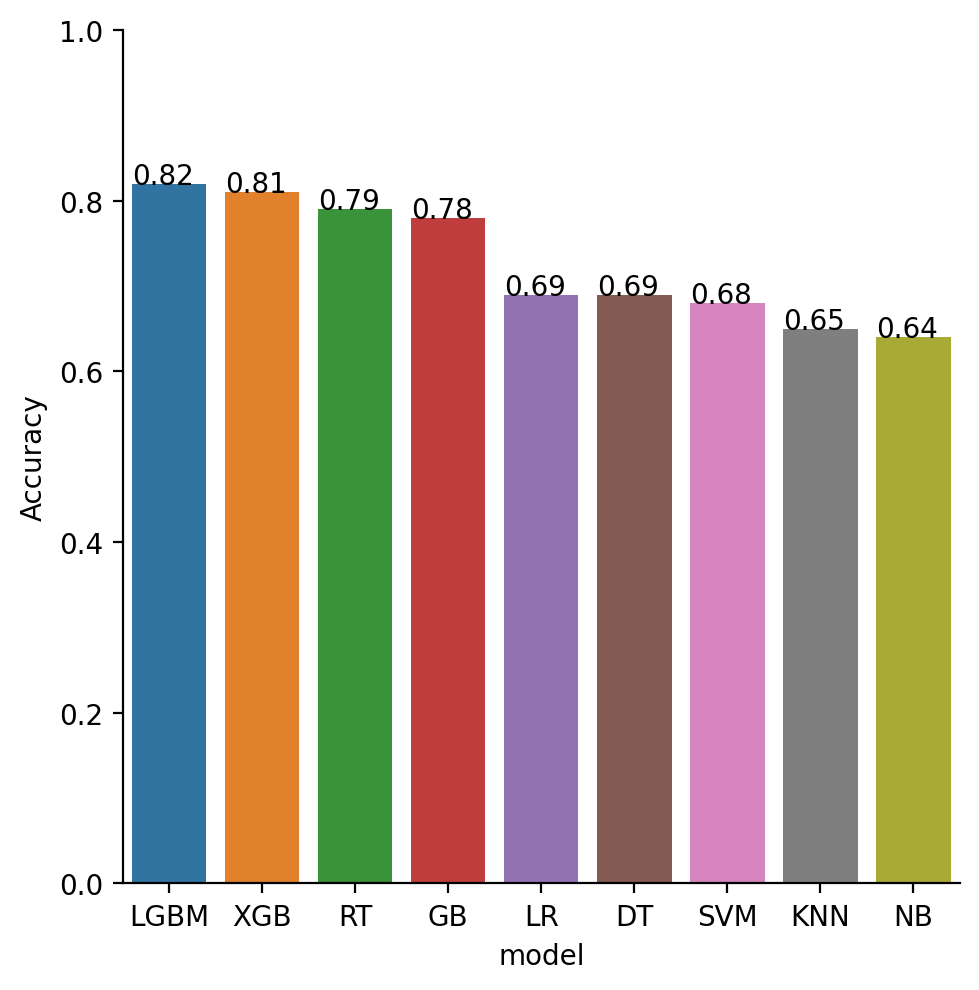

In [116]:
g = sns.catplot(x='model',y='Accuracy',kind='bar',data=df_model_scores.sort_values('Accuracy' , ascending = False))
g.ax.set_ylim(0,1)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) 
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

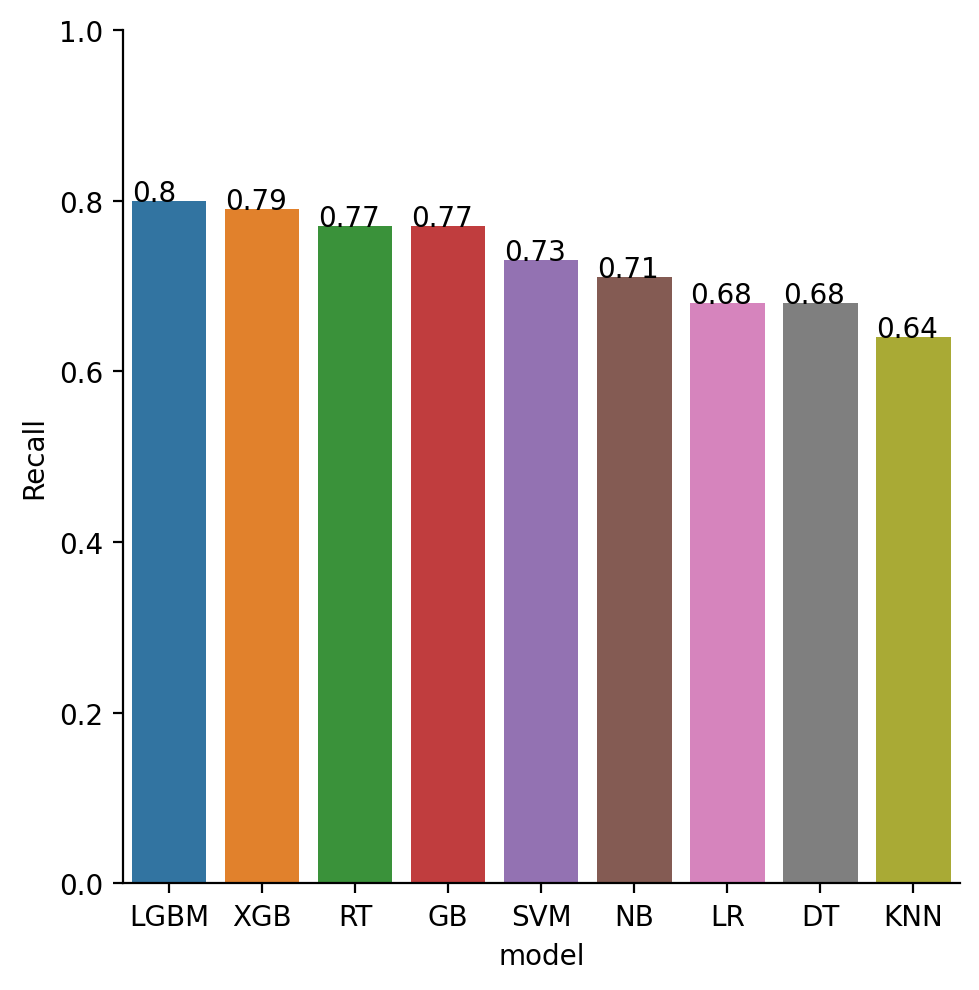

In [117]:
g = sns.catplot(x='model',y='Recall',kind='bar',data=df_model_scores.sort_values('Recall' , ascending = False))
g.ax.set_ylim(0,1)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) 
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

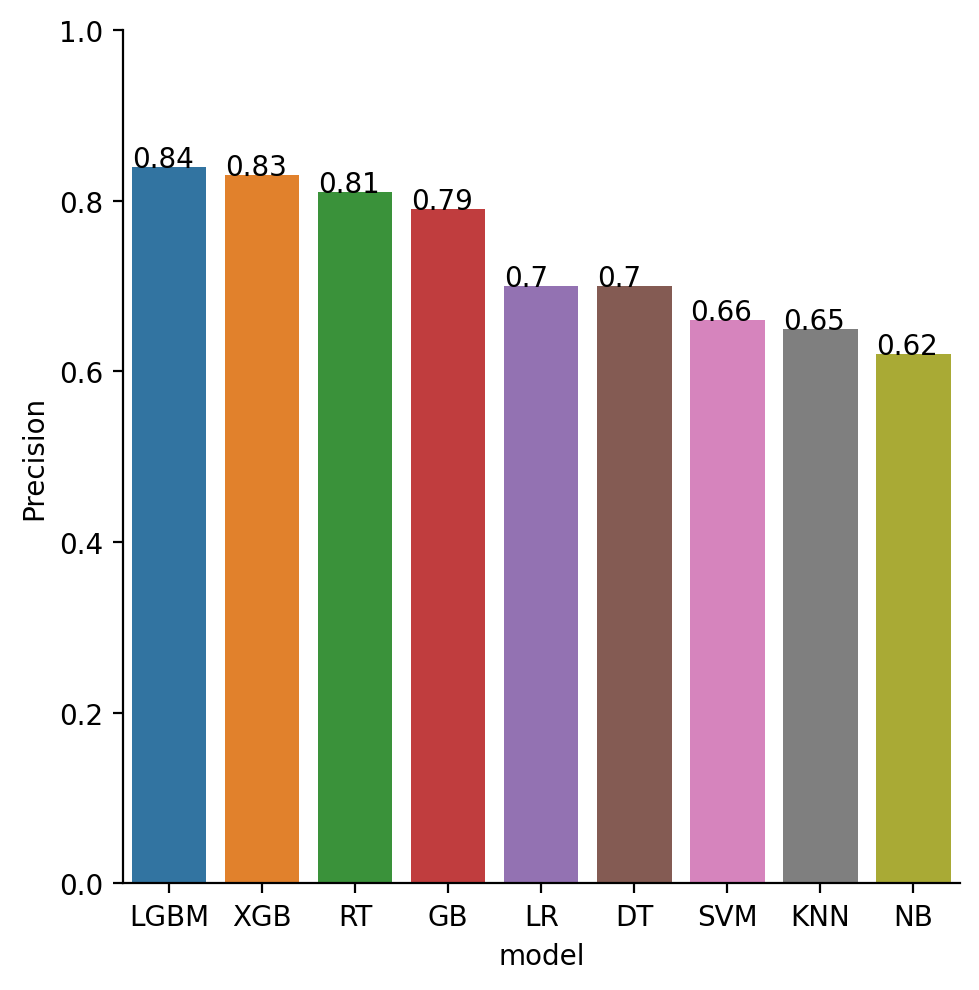

In [118]:
g = sns.catplot(x='model',y='Precision',kind='bar',data=df_model_scores.sort_values('Precision' , ascending = False))
g.ax.set_ylim(0,1)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) 
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

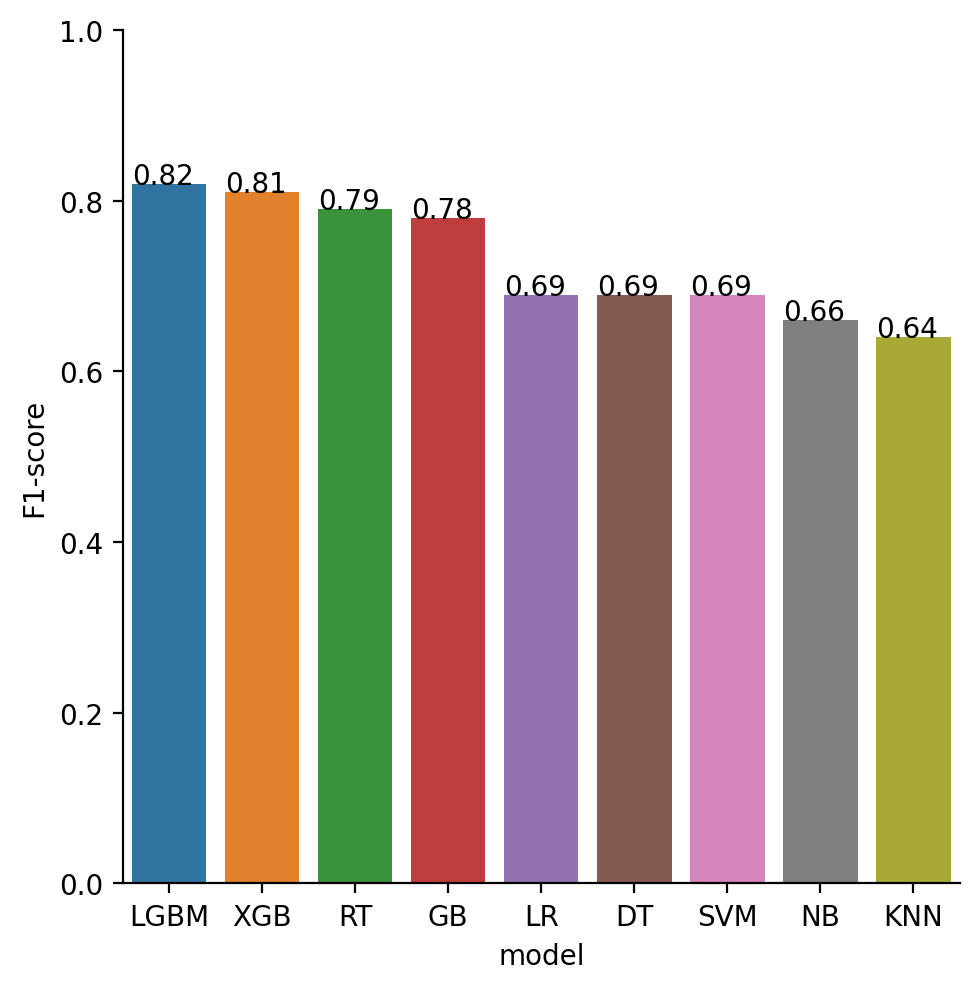

In [119]:
g = sns.catplot(x='model',y='F1-score',kind='bar',data=df_model_scores.sort_values('F1-score' , ascending = False))
g.ax.set_ylim(0,1)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) 
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [120]:
asasas

NameError: name 'asasas' is not defined

## feature importance (under sample) 

In [ ]:
features = pd.Series(rf.feature_importances_, index=X_rus.columns).sort_values(ascending=False)

sns.barplot(x=features, y=features.index)
plt.xlabel('Score')
plt.ylabel('Parameter')
plt.title('Feature Importance')
plt.show()

In [ ]:
fs = pd.Series(rf.feature_importances_, index=X_rus.columns).sort_values(ascending=False)
fs[fs > 0.045]

In [ ]:
fs = pd.Series(rf.feature_importances_, index=X_rus.columns).sort_values(ascending=False)
fs[fs > 0.00]

In [ ]:
asasas

## Decision Tree UnderSample (fea im)

In [ ]:
X = df[['Cholesterol','HCT','LDL-Cholesterol','Potassium','Creatinine',
       'vital_bmi','Triglyceride','vital_rr','patientAge','FBS','vital_bps','vital_bpd','vital_pulse',
       'vital_temperature','patientSexName','alcohol','Hypertension']]
y = df['stroke']

In [ ]:
# X = df[['Cholesterol','HCT','LDL-Cholesterol','Potassium','Creatinine',
#        'vital_bmi','Triglyceride','vital_rr','patientAge','FBS','vital_bps','vital_bpd','vital_pulse']]
# y = df['stroke']

In [ ]:
# X = df[['Cholesterol','Creatinine','LDL_level_e','Triglyceride','health_level_e','FBS','vital_bpd',
#        'vital_bps','vital_pulse','Age_R_e','Potassium','HCT','patientSexName','smoking','Diabetes_Mellitus']]
# y = df['stroke']

In [ ]:
rus = RandomUnderSampler(sampling_strategy=1) 
X_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
Counter(y_rus)

In [ ]:
# train 90 & test 10 
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.15, random_state=123)

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)

In [ ]:
dt.score(X_train,y_train)

In [ ]:
dt.score(X_test,y_test)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

## Random Forest UnderSample (fea im)

In [ ]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
# X_train

In [ ]:
rf.score(X_train, y_train)

In [ ]:
rf.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
# y_train

In [ ]:
# y_pred_train = rf.predict(X_train)

In [ ]:
# print(classification_report(y_train, y_pred_train))

## Gradien UnderSample (fea im)

In [ ]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)

In [ ]:
GBC.score(X_train, y_train)

In [ ]:
GBC.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## XGBoost UnderSample (fea im)

In [ ]:
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

In [ ]:
xg.score(X_train, y_train)

In [ ]:
xg.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## Lightgbm 

In [ ]:
# conda install lightgbm
import lightgbm as lgb
lgb = lgb.LGBMClassifier()
lgb.fit(X_train,y_train)
y_pred = lgb.predict(X_test)

In [ ]:
lgb.score(X_train, y_train)

In [ ]:
lgb.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## Naive Bayes UnderSample (fea im)

In [ ]:
from sklearn.naive_bayes import MultinomialNB # MultinomialNB or BernoulliNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [ ]:
nb.score(X_train, y_train)

In [ ]:
nb.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## LR UnderSample (fea im)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
lr.score(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## SVM UnderSample (fea im)

In [ ]:
from sklearn import svm 
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [ ]:
svm.score(X_train, y_train)

In [ ]:
svm.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)
y_pred = KNN_model.predict(X_test)

In [ ]:
KNN_model.score(X_train, y_train)

In [ ]:
KNN_model.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## SMOTE 

In [ ]:
# sm = SMOTE(random_state = 10)
# X_sm, y_sm = sm.fit_resample(X, y)

In [ ]:
# Counter(y_sm)

In [ ]:
# # train 80 & test 20 
# X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=7)

In [ ]:
# from sklearn import tree
# dt = tree.DecisionTreeClassifier()

In [ ]:
# dt.fit(X_train,y_train)

In [ ]:
# dt.score(X_train,y_train)

In [ ]:
# dt.score(X_test,y_test)

In [ ]:
# y_pred = dt.predict(X_test)

In [ ]:
# print(classification_report(y_test, y_pred))

## Scale  (mean=0, std=1)

In [ ]:
df.head()

In [ ]:
from sklearn import preprocessing

In [ ]:
# scaler = preprocessing.StandardScaler()
# cols = df[['Age_R_e','patientSexName','smoking','exercise','alcohol','health_level_e',
#            'vital_hr','vital_pulse','vital_temperature','vital_rr','vital_bps',
#           'vital_bpd','Cholesterol','Creatinine','FBS','LDL_level_e','Triglyceride',
#           'Potassium','HCT','Hypertension','Hyperlipidaemia','Diabetes_Mellitus','Hemiplegia',
#           'Chronic_kidney','Atrial_fibrillation','Hypokalemia']]
# scaler.fit(cols)
# z = scaler.transform(cols)
# z[:2]

In [ ]:
# scaler = preprocessing.StandardScaler()
# cols = df[['patientAge','patientSexName','smoking','alcohol','vital_bmi',
#            'vital_hr','vital_pulse','vital_temperature','vital_rr','vital_bps',
#           'vital_bpd','Cholesterol','Creatinine','FBS','LDL-Cholesterol','Triglyceride',
#           'Potassium','HCT','Hypertension','Hyperlipidaemia','Diabetes_Mellitus','Hemiplegia',
#           'Chronic_kidney','Atrial_fibrillation','Hypokalemia','Age_R_e','health_level_e','LDL_level_e']]
# scaler.fit(cols)
# z = scaler.transform(cols)
# z[:2]

In [ ]:
scaler = preprocessing.StandardScaler()
cols = df[['patientAge','patientSexName','vital_bmi',
           'vital_hr','vital_pulse','vital_temperature','vital_rr','vital_bps',
          'vital_bpd','Cholesterol','Creatinine','FBS','LDL-Cholesterol','Triglyceride',
          'Potassium','HCT','Hypertension','Hyperlipidaemia','Diabetes_Mellitus','Hemiplegia',
          'Chronic_kidney','Atrial_fibrillation','Hypokalemia','Age_R_e','health_level_e','LDL_level_e']]
scaler.fit(cols)
z = scaler.transform(cols)
z[:2]

In [ ]:
# df_s = pd.concat([df, pd.DataFrame(z, columns=['z_Age_R_e','z_patientSexName','z_smoking','z_exercise',
#                                              'z_alcohol','z_health_level_e','z_vital_hr','z_vital_pulse',
#                                              'z_vital_temperature','z_vital_rr','z_vital_bps','z_vital_bpd',
#                                              'z_Cholesterol','z_Creatinine','z_FBS','z_LDL_level_e',
#                                              'z_Triglyceride','z_Potassium','z_HCT','z_Hypertension','z_Hyperlipidaemia',
#                                               'z_Diabetes_Mellitus', 'z_Hemiplegia','z_Chronic_kidney','z_Atrial_fibrillation',
#                                               'z_Hypokalemia'])], axis=1)
# df_s.head

In [ ]:
df_s = pd.concat([df, pd.DataFrame(z, columns=['z_patientAge','z_patientSexName','z_vital_bmi','z_vital_hr','z_vital_pulse',
                                             'z_vital_temperature','z_vital_rr','z_vital_bps','z_vital_bpd',
                                             'z_Cholesterol','z_Creatinine','z_FBS','z_LDL-Cholesterol',
                                             'z_Triglyceride','z_Potassium','z_HCT','z_Hypertension','z_Hyperlipidaemia',
                                              'z_Diabetes_Mellitus', 'z_Hemiplegia','z_Chronic_kidney','z_Atrial_fibrillation',
                                              'z_Hypokalemia','z_Age_R_e','z_health_level_e','z_LDL_level_e'])], axis=1)
df_s.head

In [ ]:
# df_s = pd.concat([df, pd.DataFrame(z, columns=['z_patientAge','z_patientSexName','z_smoking',
#                                              'z_alcohol','z_vital_bmi','z_vital_hr','z_vital_pulse',
#                                              'z_vital_temperature','z_vital_rr','z_vital_bps','z_vital_bpd',
#                                              'z_Cholesterol','z_Creatinine','z_FBS','z_LDL-Cholesterol',
#                                              'z_Triglyceride','z_Potassium','z_HCT','z_Hypertension','z_Hyperlipidaemia',
#                                               'z_Diabetes_Mellitus', 'z_Hemiplegia','z_Chronic_kidney','z_Atrial_fibrillation',
#                                               'z_Hypokalemia','z_Age_R_e','z_health_level_e','z_LDL_level_e'])], axis=1)
# df_s.head

In [ ]:
df_s

In [ ]:
# df_s = df_s.drop(['Age_R_e','patientSexName','smoking','alcohol','health_level_e',
#            'vital_hr','vital_pulse','vital_temperature','vital_rr','vital_bps',
#           'vital_bpd','Cholesterol','Creatinine','FBS','LDL_level_e','Triglyceride',
#           'Potassium','HCT','Hypertension','Hyperlipidaemia','Diabetes_Mellitus','Hemiplegia',
#           'Chronic_kidney','Atrial_fibrillation','Hypokalemia','patientAge','vital_bmi','LDL-Cholesterol'],axis = 1)
# df_s

In [ ]:
df_s = df_s.drop(['Age_R_e','patientSexName','health_level_e',
           'vital_hr','vital_pulse','vital_temperature','vital_rr','vital_bps',
          'vital_bpd','Cholesterol','Creatinine','FBS','LDL_level_e','Triglyceride',
          'Potassium','HCT','Hypertension','Hyperlipidaemia','Diabetes_Mellitus','Hemiplegia',
          'Chronic_kidney','Atrial_fibrillation','Hypokalemia','patientAge','vital_bmi','LDL-Cholesterol'],axis = 1)
df_s

In [ ]:
# X = df_s.drop(['rowID', 'stroke','Age_R','health_level','LDL_level','patientAge','vital_bmi','LDL-Cholesterol'], axis=1)
# y = df_s['stroke']

In [ ]:
X = df_s.drop(['rowID', 'stroke','Age_R','health_level','LDL_level','z_Age_R_e','z_health_level_e','z_LDL_level_e'], axis=1)
y = df_s['stroke']

In [ ]:
X

In [ ]:
rus = RandomUnderSampler(sampling_strategy=1) 
X_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
Counter(y_rus)

In [ ]:
# train 90 & test 10
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.15,shuffle=True ,random_state=123)

In [ ]:
asasas

## Decision Tree 

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [ ]:
dt.score(X_train, y_train)

In [ ]:
dt.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## Random Forest 

In [ ]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
rf.score(X_train, y_train)

In [ ]:
rf.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)
y_pred = KNN_model.predict(X_test)

In [ ]:
KNN_model.score(X_train,y_train)

In [ ]:
KNN_model.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## Rogistic 

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
lr.score(X_train,y_train)

In [ ]:
lr.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## SVM 

In [ ]:
from sklearn import svm 
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [ ]:
svm.score(X_train,y_train)

In [ ]:
svm.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## Gradien

In [ ]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)

In [ ]:
GBC.score(X_train,y_train)

In [ ]:
GBC.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## XGBoost 

In [ ]:
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

In [ ]:
xg.score(X_train,y_train)

In [ ]:
xg.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## Lightgbm 

In [ ]:
# conda install lightgbm
import lightgbm as lgb
lgb = lgb.LGBMClassifier()
lgb.fit(X_train,y_train)
y_pred = lgb.predict(X_test)

In [ ]:
lgb.score(X_train,y_train)

In [ ]:
lgb.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [ ]:
nb.score(X_train,y_train)

In [ ]:
nb.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## Feature Importance

In [ ]:
features = pd.Series(rf.feature_importances_, index=X_rus.columns).sort_values(ascending=False)

sns.barplot(x=features, y=features.index)
plt.xlabel('Score')
plt.ylabel('Parameter')
plt.title('Feature Importance')
plt.show()

In [ ]:
fs = pd.Series(rf.feature_importances_, index=X_rus.columns).sort_values(ascending=False)
fs[fs >= 0.045]

In [ ]:
X = df_s[['z_Cholesterol','z_Creatinine','z_FBS','z_vital_bmi','z_Triglyceride','z_LDL-Cholesterol',
        'z_Potassium','z_HCT','z_patientAge','z_vital_rr','z_vital_bps','z_vital_bpd']]
y = df_s['stroke']

In [ ]:
rus = RandomUnderSampler(sampling_strategy=1) 
X_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
Counter(y_rus)

In [ ]:
# train 90 & test 10 
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.15, random_state=123)

## DT

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [ ]:
dt.score(X_train,y_train)

In [ ]:
dt.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## RF 

In [ ]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
rf.score(X_train,y_train)

In [ ]:
rf.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)
y_pred = KNN_model.predict(X_test)

In [ ]:
KNN_model.score(X_train,y_train)

In [ ]:
KNN_model.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## LR

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
lr.score(X_train,y_train)

In [ ]:
lr.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## SVM

In [ ]:
from sklearn import svm 
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [ ]:
svm.score(X_train,y_train)

In [ ]:
svm.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## GBC 

In [ ]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)

In [ ]:
GBC.score(X_train,y_train)

In [ ]:
GBC.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## XGBoost

In [ ]:
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

In [ ]:
xg.score(X_train,y_train)

In [ ]:
xg.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## LGBM

In [ ]:
# conda install lightgbm
import lightgbm as lgb
lgb = lgb.LGBMClassifier()
lgb.fit(X_train,y_train)
y_pred = lgb.predict(X_test)

In [ ]:
lgb.score(X_train,y_train)

In [ ]:
lgb.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [ ]:
nb.score(X_train,y_train)

In [ ]:
nb.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

## Lazy Predict

Lazy Predict
มันเป็นหนึ่งในไลบรารีไพทอนที่ช่วยทำงานในการเรียนรู้ของเครื่องกึ่งอัตโนมัติ มันสร้างโมเดลพื้นฐานจำนวนมากโดยไม่ต้องใช้โค้ดมาก และช่วยให้เข้าใจว่าโมเดลใดทำงานได้ดีขึ้นโดยไม่ต้องปรับพารามิเตอร์ใดๆ

สมมติว่าเรามีคำสั่งเกี่ยวกับปัญหาและเราจำเป็นต้องใช้แบบจำลองทั้งหมดในชุดข้อมูลนั้นจริง ๆ และเราต้องวิเคราะห์ว่าแบบจำลองพื้นฐานของเราทำงานเป็นอย่างไร โมเดลพื้นฐานในที่นี้หมายถึง "โมเดลที่ไม่มีพารามิเตอร์" ดังนั้นเราจึงสามารถทำงานนี้ได้โดยตรงโดยใช้ Lazy Predict หลังจากได้ความแม่นยำทั้งหมดแล้ว เราสามารถเลือกโมเดล 5 อันดับแรก จากนั้นใช้การปรับไฮเปอร์พารามิเตอร์กับโมเดลเหล่านั้นได้

In [ ]:
df

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
X = df.drop(['rowID', 'stroke','Age_R','health_level','LDL_level','Age_R_e','health_level_e','LDL_level_e'], axis=1)
y = df['stroke']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state =123)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

In [ ]:
print(models)

In [ ]:
rus = RandomUnderSampler(sampling_strategy=1) 
X_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
Counter(y_rus)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus,test_size=0.15,random_state =123)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

In [ ]:
print(models)

In [ ]:
# !pip install auto-sklearn